In [1]:
# for numerical/scientific calculations
import numpy as np
# for data manipulation
import pandas as pd
# for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

# for data preparation
# encoding
from sklearn.preprocessing import LabelEncoder
# scaling/normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# recursive feature elimination
from sklearn.feature_selection import RFE
# feature selection
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# for machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, classification_report, accuracy_score

# for regression
from sklearn.linear_model import LinearRegression

# for classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# for clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

# for cross-validation
from sklearn.model_selection import KFold

# for ensemble methods
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# to ignore/not display warnings
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
parkinsons_df = pd.read_csv('parkinsons.data.csv')

In [3]:
parkinsons_df.shape

(195, 24)

In [4]:
parkinsons_df.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
parkinsons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [6]:
parkinsons_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


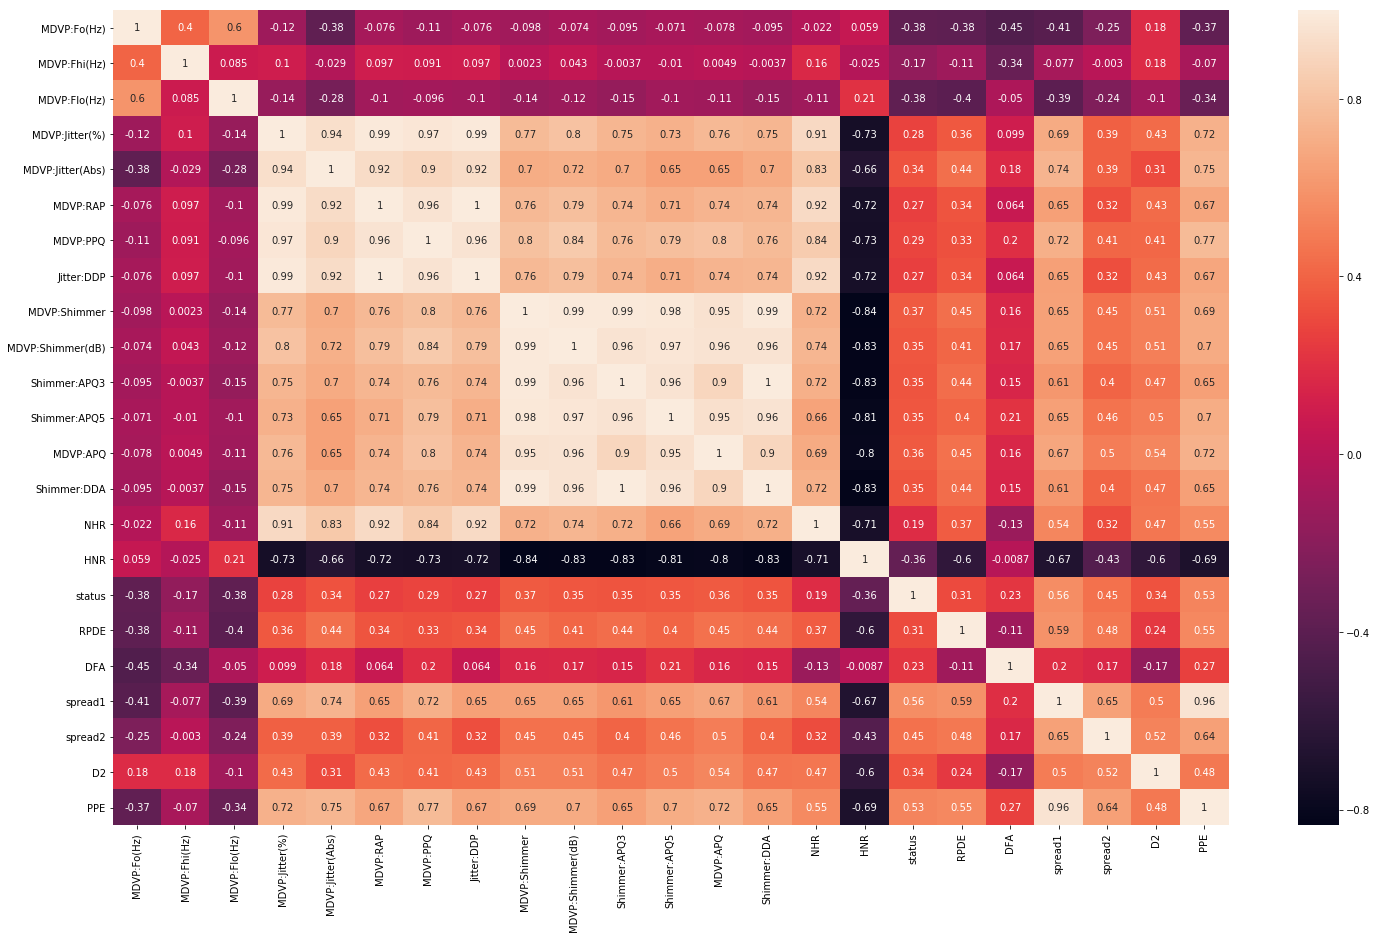

In [7]:
plt.figure(figsize=(25,15))
sns.heatmap(parkinsons_df.corr(),annot=True)

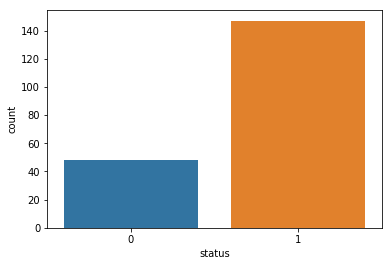

In [8]:
sns.countplot(parkinsons_df['status'])

In [9]:
parkinsons_df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

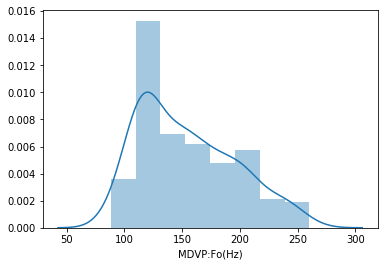

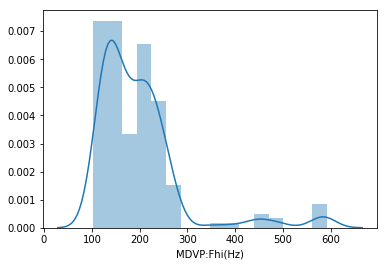

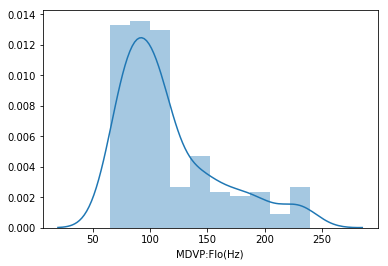

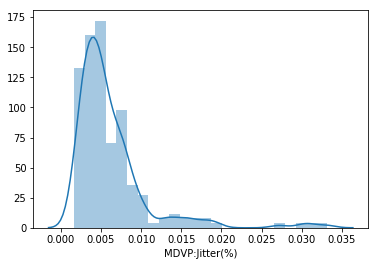

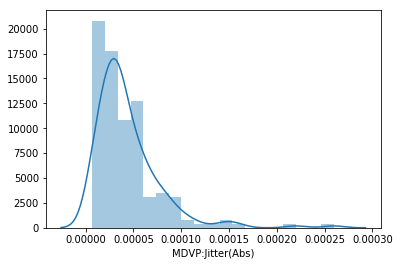

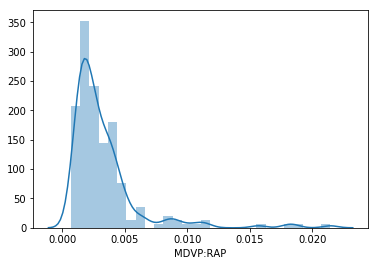

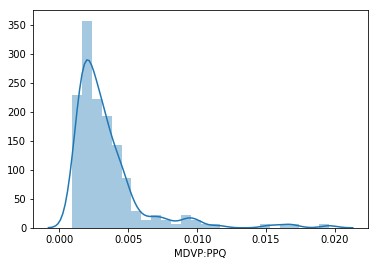

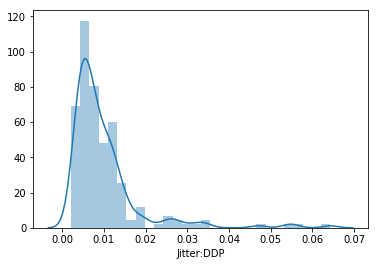

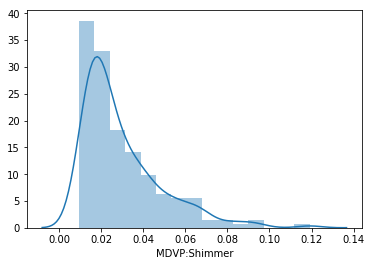

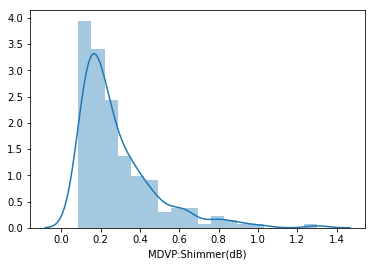

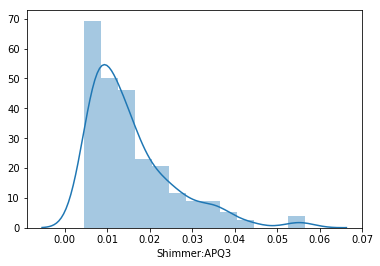

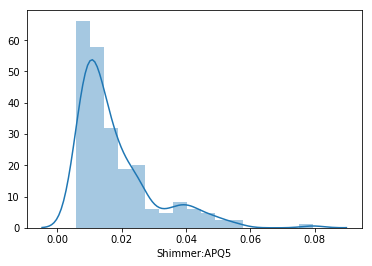

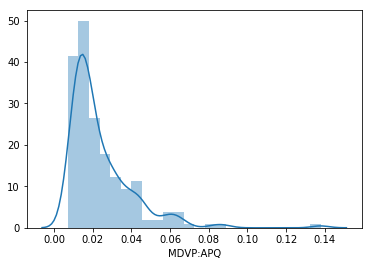

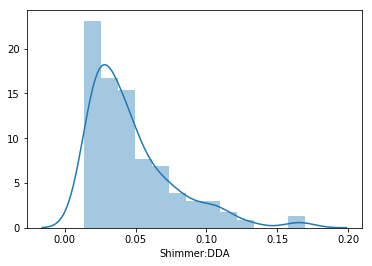

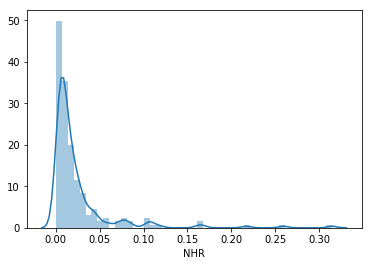

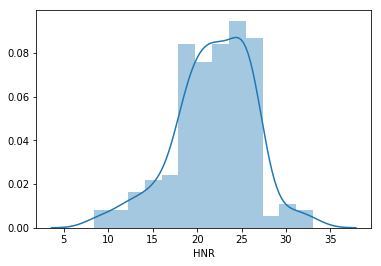

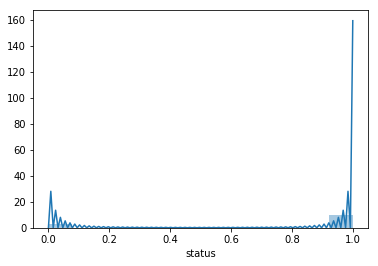

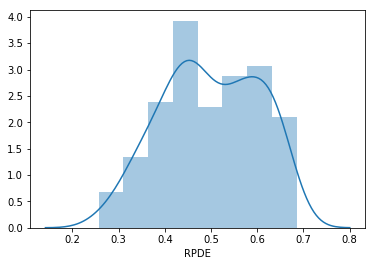

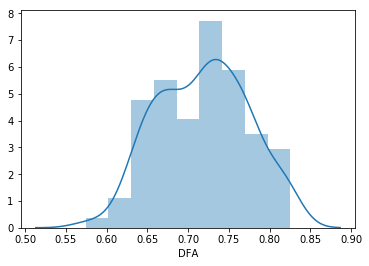

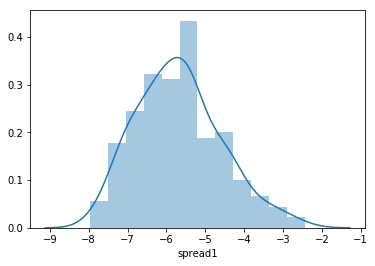

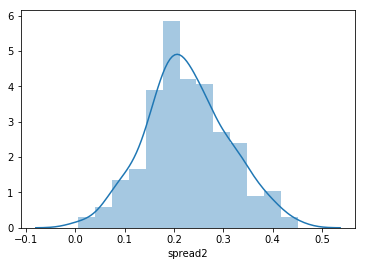

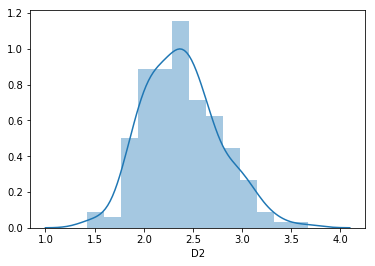

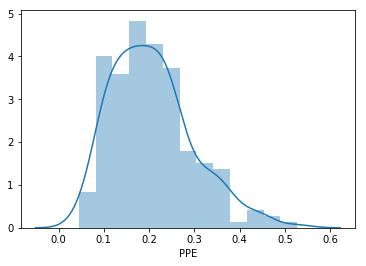

In [10]:
for col in parkinsons_df.columns:
    if parkinsons_df[col].dtype in ['int64','float64']:
        sns.distplot(parkinsons_df[col])
        plt.show()

In [11]:
X = parkinsons_df.drop(columns=['status','name'])
y = parkinsons_df['status']

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### PCA

In [13]:
pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## Classification Algorithms

In [14]:
logistic = LogisticRegression(random_state=42)
logistic.fit(X_train,y_train)
y_pred = logistic.predict(X_test)
ls = logistic.score(X_test,y_test)

In [15]:
print(ls)
cml = pd.DataFrame(confusion_matrix(y_test,y_pred),index=logistic.classes_,columns=logistic.classes_)
cml

0.8974358974358975


,0,1
0,4,3
1,1,31


In [16]:
DT = DecisionTreeClassifier(random_state=42)
DT.fit(X_train,y_train)
y_pred = DT.predict(X_test)
dts = DT.score(X_test,y_test)

In [17]:
print(dts)
cmdt = pd.DataFrame(confusion_matrix(y_test,y_pred),index=DT.classes_,columns=DT.classes_)
cmdt

0.8205128205128205


,0,1
0,5,2
1,5,27


In [18]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
knns = KNN.score(X_test,y_test)

In [19]:
print(knns)
cmknn = pd.DataFrame(confusion_matrix(y_test,y_pred),index=KNN.classes_,columns=KNN.classes_)
cmknn

0.8205128205128205


,0,1
0,3,4
1,3,29


In [20]:
SV = SVC(kernel='linear',random_state=42)
SV.fit(X_train,y_train)
y_pred = SV.predict(X_test)
svs = SV.score(X_test,y_test)

In [21]:
print(svs)
cmsvc = pd.DataFrame(confusion_matrix(y_test,y_pred),index=SV.classes_,columns=SV.classes_)
cmsvc

0.9230769230769231


,0,1
0,4,3
1,0,32


## Ensemble Methods

In [22]:
Randomforest = RandomForestClassifier(n_estimators=10,min_samples_split=10,min_impurity_split=0.05,random_state=42)
Randomforest.fit(X_train,y_train)
rfs = Randomforest.score(X_train,y_train)

In [23]:
AdaBoost = AdaBoostClassifier(n_estimators=10,random_state=42)
AdaBoost.fit(X_train,y_train)
ads = AdaBoost.score(X_train,y_train)

In [24]:
acc = pd.DataFrame({'Algorithm':['Logistic Regression','Decision Trees','K-Nearest Neighbors','Support Vector Machine','Random Forest','AdaBoost'],'Accuracy':[ls,dts,knns,svs,rfs,ads]})

In [25]:
acc

,Algorithm,Accuracy
0,Logistic Regression,0.897436
1,Decision Trees,0.820513
2,K-Nearest Neighbors,0.820513
3,Support Vector Machine,0.923077
4,Random Forest,0.942308
5,AdaBoost,0.961538


In [26]:
x=acc.T

In [27]:
x

,0,1,2,3,4,5
Algorithm,Logistic Regression,Decision Trees,K-Nearest Neighbors,Support Vector Machine,Random Forest,AdaBoost
Accuracy,0.897436,0.820513,0.820513,0.923077,0.942308,0.961538
